In [1]:
import numpy as np
import pandas as pd

In [2]:
#Reading Data
train_set = pd.read_csv('../../Datasets/Housingdata/Housing_Train.csv')
test_set = pd.read_csv('../../Datasets/Housingdata/Housing_Test.csv')
train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.25199,0.0,10.59,0.0,0.489,5.783,72.7,4.3549,4,277,18.6,389.43,NaN,22.5
1,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
2,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4,307,21.0,396.90,18.72,15.2
3,NaN,0.0,18.10,1.0,0.631,6.683,96.8,1.3567,24,666,20.2,375.33,3.73,50.0
4,12.80230,0.0,18.10,0.0,0.740,5.854,96.6,1.8956,24,666,20.2,240.52,23.79,10.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.00245,0.0,8.14,0.0,0.538,6.674,87.3,4.2390,4,307,21.0,380.23,11.98,21.0
401,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5,224,20.2,394.81,10.56,18.5
402,2.81838,0.0,18.10,0.0,0.532,5.762,40.3,4.0983,24,666,20.2,392.92,10.42,21.8
403,0.44791,0.0,6.20,1.0,0.507,6.726,66.5,3.6519,8,307,17.4,360.20,8.05,29.0


In [3]:
#splliting datasets
y_train = train_set['MEDV']
x_train = train_set.drop(columns='MEDV')

x_test = test_set

In [4]:
#check dataset
x_train.isnull().sum()
x_test.isnull().sum()

CRIM       3
ZN         5
INDUS      6
CHAS       4
NOX        0
RM         0
AGE        5
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      2
dtype: int64

In [5]:
#fill Null values
def replace_null_values(cols: list, dataset: pd.DataFrame):
    for col in cols:
        temp = dataset[col].dropna()
        mode = temp.mean()
        dataset[col].fillna(mode, inplace=True)

na_cols = list(x_train.columns[x_train.isnull().any()])
na_cols_test = list(x_test.columns[x_test.isnull().any()])

replace_null_values(na_cols, x_train)
replace_null_values(na_cols_test, x_test)

Text(106.5, 0.5, 'Variable 1')

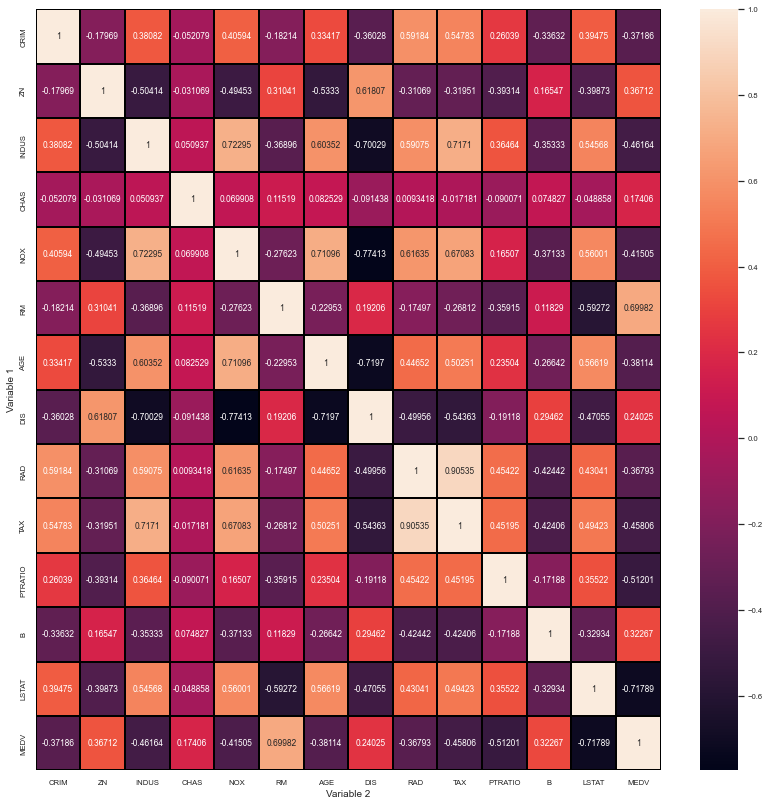

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

full_set = pd.concat([x_train, y_train], axis=1)
plt.figure(figsize=(len(full_set.columns), len(full_set.columns)), facecolor='w', edgecolor='k')
sns.set(font_scale=0.7)
sns.heatmap(full_set.corr(),
            annot=True,
            fmt='.5g',
            linewidths=2,
            linecolor='black')
plt.xlabel('Variable 2',fontsize=10)
plt.ylabel('Variable 1',fontsize=10)

In [7]:
#feature Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# scaler = MinMaxScaler()
scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

In [8]:
#apply poly of degree2

def apply_poly(df:pd.DataFrame, cols: list):
    for col in cols:
        df[col+"deg2"] = df[col].apply(lambda x:np.power(x, 2))


apply_poly(x_train, x_train.columns)
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,CHASdeg2,NOXdeg2,RMdeg2,AGEdeg2,DISdeg2,RADdeg2,TAXdeg2,PTRATIOdeg2,Bdeg2,LSTATdeg2
0,-3.876318e-01,-0.47817,-0.103557,-0.278664,-0.589166,-0.696477,0.140104,0.290040,-0.661477,-0.794024,...,0.077653,0.347117,0.485081,0.019629,0.084123,0.437552,0.630474,0.001098,0.131144,1.569704e-30
1,-3.451293e-01,-0.47817,-0.470374,-0.278664,-0.162933,-0.461482,-0.258038,0.461769,-0.661477,-0.616881,...,0.077653,0.026547,0.212966,0.066584,0.213230,0.437552,0.380542,1.317257,0.197540,4.511283e-01
2,-2.773191e-01,-0.47817,-0.470374,-0.278664,-0.162933,-0.188265,0.834113,0.105941,-0.661477,-0.616881,...,0.077653,0.026547,0.035444,0.695744,0.011224,0.437552,0.380542,1.317257,0.197540,6.461639e-01
3,1.998559e-16,-0.47817,1.020850,3.736157,0.646041,0.577592,1.020399,-1.170187,1.636106,1.502932,...,13.958869,0.417368,0.333613,1.041214,1.369338,2.676843,2.258805,0.602474,0.042750,1.717855e+00
4,1.024389e+00,-0.47817,1.020850,-0.278664,1.594192,-0.595967,1.013094,-0.907724,1.636106,1.502932,...,0.077653,2.541450,0.355177,1.026359,0.823963,2.676843,2.258805,0.602474,1.635323,2.307438e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,-3.031984e-01,-0.47817,-0.470374,-0.278664,-0.162933,0.564852,0.673395,0.233593,-0.661477,-0.616881,...,0.077653,0.026547,0.319057,0.453460,0.054566,0.437552,0.380542,1.317257,0.067994,2.158308e-02
401,-4.125615e-01,-0.47817,-0.912052,-0.278664,-0.363002,-0.537927,-0.338397,0.903753,-0.546598,-1.106977,...,0.077653,0.131770,0.289365,0.114513,0.816769,0.298769,1.225398,0.602474,0.177598,1.205612e-01
402,-9.889021e-02,-0.47817,1.020850,-0.278664,-0.215125,-0.726206,-1.043364,0.165067,1.636106,1.502932,...,0.077653,0.046279,0.527375,1.088609,0.027247,2.676843,2.258805,0.602474,0.160478,1.346654e-01
403,-3.655891e-01,-0.47817,-0.760833,3.736157,-0.432591,0.638464,-0.086362,-0.052345,-0.201960,-0.616881,...,13.958869,0.187135,0.407637,0.007458,0.002740,0.040788,0.380542,0.274734,0.001603,4.917989e-01


In [9]:
# Linear Regression
class LinearRegression:
    def __init__(self):
        self.weight = None

    def fit(self, x:pd.DataFrame, y:pd.DataFrame, epoch:int, learning_rate:float):
        m = len(x)
        if x.iloc[0, 0] != 1:
            x.insert(0, 'bias', 1)

        self.weight = np.ones(len(x.columns))

        for i in range(epoch):
            gradient = 2/m * x.T.dot(self.predict(x) - y)
            self.weight = self.weight - learning_rate * gradient

    def predict(self, df:pd.DataFrame):
        if df.iloc[0, 0] != 1:
            df.insert(0, 'bias', 1)
        return np.dot(df, self.weight)

In [10]:
reg = LinearRegression()
reg.fit(x_train, y_train, 1000, 0.01)

In [11]:
# Evaluating Model
from sklearn.metrics import mean_squared_error, r2_score
y_pred_train = reg.predict(x_train)

mse_error = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse_error)
r2_error = r2_score(y_train, y_pred_train)

errors = pd.DataFrame({'Value': [mse_error, rmse, r2_error]}, index=['MSE', 'RMSE', 'R2'])
errors

,Value
MSE,15.982585
RMSE,3.997823
R2,0.814057


In [12]:
#running model on test set

apply_poly(x_test, x_test.columns)

y_test_pred = pd.DataFrame(reg.predict(x_test), columns=['MEDV'])
y_test_pred.to_csv('house_pred.csv', index=False)